In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv('Titanic-Dataset.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df= df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [13]:
label_encoder=LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])

In [15]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [19]:
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 52.3+ KB


In [25]:
df['Embarked']=label_encoder.fit_transform(df['Embarked'])

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [29]:
corr_matrix=df.corr()

In [65]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [81]:
corrX=X.corr()
corrX.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.157112
Sex,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.014205
SibSp,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.066654
Parch,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.038322


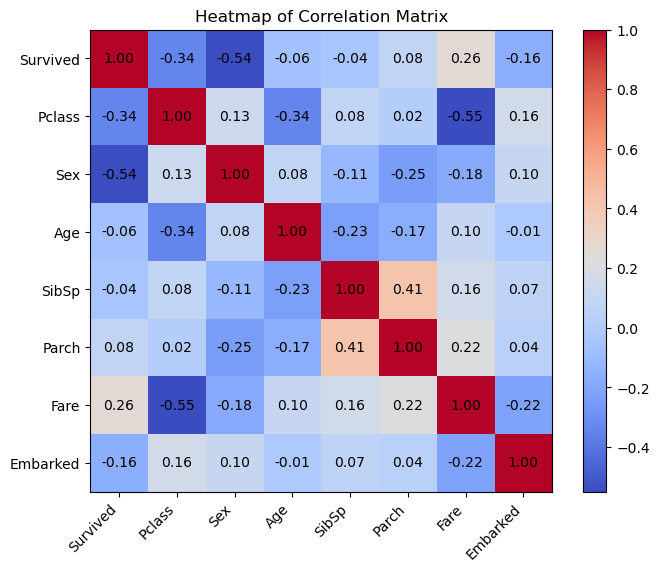

In [75]:
fig, ax = plt.subplots(figsize=(8, 6))  # Set figure size
cax = ax.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")

fig.colorbar(cax)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        ax.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(corr_matrix.columns)

plt.title("Heatmap of Correlation Matrix")
plt.show()

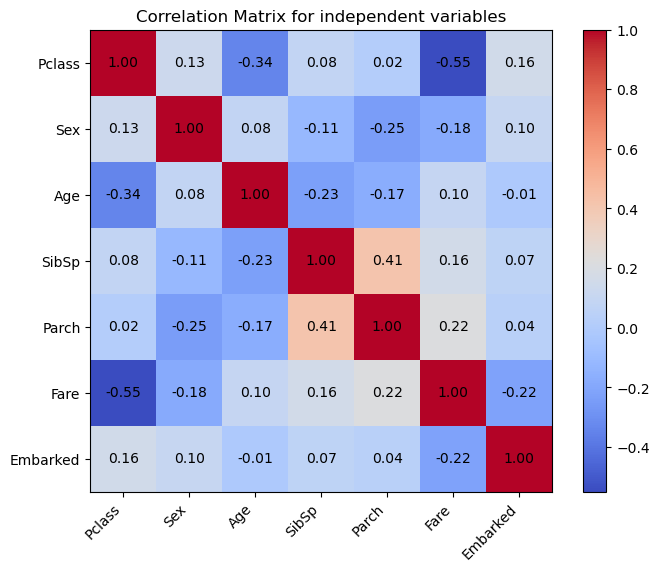

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))  # Set figure size
cax = ax.imshow(corrX, cmap="coolwarm", interpolation="nearest")

fig.colorbar(cax)

# (correlation values)
for i in range(len(corrX)):
    for j in range(len(corrX)):
        ax.text(j, i, f"{corrX.iloc[i, j]:.2f}", ha="center", va="center", color="black")

ax.set_xticks(np.arange(len(corrX.columns)))
ax.set_yticks(np.arange(len(corrX.columns)))
ax.set_xticklabels(corrX.columns, rotation=45, ha="right")
ax.set_yticklabels(corrX.columns)

plt.title("Correlation Matrix for independent variables")
plt.show()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
random_state=42)

In [91]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [93]:
y_pred=model.predict(X_test)

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [101]:
print(accuracy_score(y_test,y_pred),"Accuracy Score")

0.8134328358208955 Accuracy Score


In [103]:
confusion_matrix(y_test,y_pred)

array([[137,  20],
       [ 30,  81]], dtype=int64)

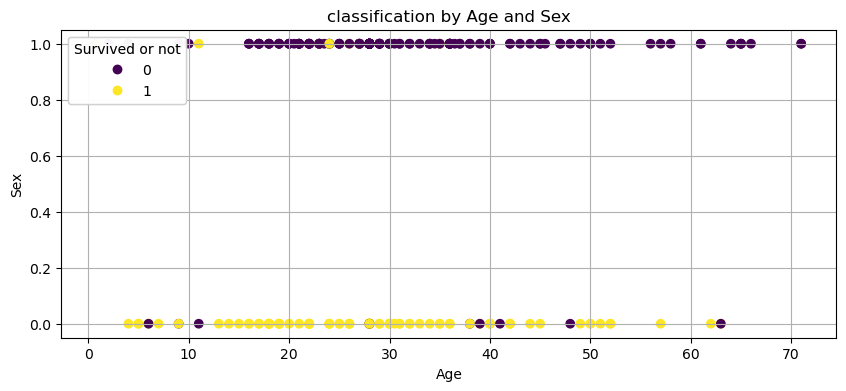

In [111]:
plt.figure(figsize=(10,4))
ax=plt.scatter(X_test['Age'],X_test['Sex'],c=y_pred)
plt.xlabel('Age')
plt.ylabel('Sex')
plt.grid()
plt.title('classification by Age and Sex')
lege=plt.legend(*ax.legend_elements(),loc="upper left",title='Survived or not')
plt.gca().add_artist(lege)